<a href="https://colab.research.google.com/github/usneek/Person-detection-using-forehead-images/blob/main/FaceNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf

In [ ]:
from keras.models import load_model
# load the model
model = load_model('drive/MyDrive/DL Assignment/keras-facenet/model/facenet_keras.h5')
model.load_weights('drive/MyDrive/DL Assignment/keras-facenet/weights/facenet_keras_weights.h5')
for layer in model.layers:
    layer.trainable = False
model.summary()

Model: "inception_resnet_v1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv2d_1a_3x3 (Conv2D)          (None, 79, 79, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
Conv2d_1a_3x3_BatchNorm (BatchN (None, 79, 79, 32)   96          Conv2d_1a_3x3[0][0]              
__________________________________________________________________________________________________
Conv2d_1a_3x3_Activation (Activ (None, 79, 79, 32)   0           Conv2d_1a_3x3_BatchNorm[0][0]    
________________________________________________________________________________

In [ ]:
embeddings=[]
path=os.listdir('drive/MyDrive/DL Assignment/Images/')
for image in range(len(path)):
  y='drive/MyDrive/DL Assignment/Images/'+path[image]
  img=cv2.imread(y)
  img=cv2.resize(img,(160,160))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = img.astype('float32')
  mean, std = img.mean(), img.std()
  img = (img - mean) / std
  img = np.array([img])
  img = tf.convert_to_tensor(img)
  vec = model.predict(img)
  vec=vec.flatten()
  embeddings.append(vec)

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
genuine=[]
imposter=[]
from scipy import spatial

path=os.listdir('drive/MyDrive/DL Assignment/Images/')
for image in range(len(path)):
  listm=path[image].split('_')
  vec=embeddings[image]
  for image_secondary in range(len(path)):
    listi=path[image_secondary].split('_')
    if(listi[2]==listm[2]):
      continue
    vec_sec=embeddings[image_secondary]
    score = 1 - spatial.distance.cosine(vec, vec_sec)
    if(listi[0]==listm[0]):
      genuine.append(score)
    else :
      imposter.append(score)

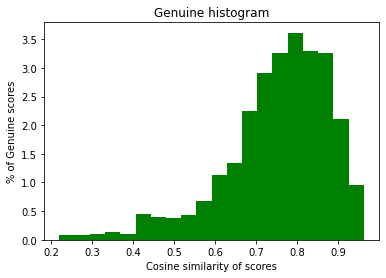

In [ ]:
import matplotlib.pyplot as plt
a = np.array(genuine)
plt.hist(a, bins =int(100/5),density=True,color='Green')
plt.ylabel("% of Genuine scores")
plt.xlabel("Cosine similarity of scores")
plt.title('Genuine histogram')
plt.show()

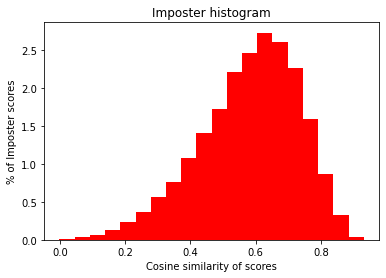

In [ ]:
import matplotlib.pyplot as plt
a = np.array(imposter)
plt.hist(a, bins =int(100/5),density=True,color='Red')
plt.ylabel("% of Imposter scores")
plt.xlabel("Cosine similarity of scores")
plt.title('Imposter histogram')
plt.show()

In [ ]:
def FAR(threshold):
  count=0;
  for i in range(len(imposter)):
    if(imposter[i]>threshold):
      count+=1;
  count=count/len(imposter)*100
  return count/(200)
def FRR(threshold):
  count=0;
  for i in range(len(genuine)):
    if(genuine[i]<threshold):
      count+=1;
  count=count/len(genuine)*100
  return count/(200)

In [ ]:
far=[]
frr=[]
threshold=[]
for i in range(100):
  threshold.append(i/100)
  far.append(FAR(i/100));
  frr.append(FRR(i/100));


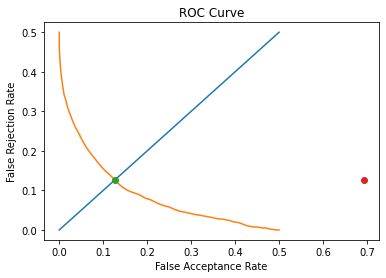

The equal acceptance rate is  12.619284587086394 %
The corresponding threshold is 0.6923886378308586


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import LineString
a=[0,0.5]
b=[0,0.5]
plt.xlabel('False Acceptance Rate')
plt.ylabel('False Rejection Rate')
plt.title('ROC Curve')
plt.plot(a, b)     #plotting y=x for FAR=FRR
plt.plot(far, frr)
first_line = LineString(np.column_stack((far, frr)))
second_line = LineString(np.column_stack((a, b)))
intersection = first_line.intersection(second_line)

if intersection.geom_type == 'MultiPoint':
    plt.plot(*LineString(intersection).xy, 'o')
elif intersection.geom_type == 'Point':
    plt.plot(*intersection.xy, 'o')
x, y = intersection.xy

############################################### finding the corresponding threshold

c=[0,0.5,1]
d=[x,x,x]
first_line = LineString(np.column_stack((threshold, far)))
second_line = LineString(np.column_stack((c, d)))
intersection = first_line.intersection(second_line)

if intersection.geom_type == 'MultiPoint':
    plt.plot(*LineString(intersection).xy, 'o')
elif intersection.geom_type == 'Point':
    plt.plot(*intersection.xy, 'o')
plt.show()
u, v = intersection.xy
print("The equal acceptance rate is ",x[0]*100,"%")
print("The corresponding threshold is",u[0])

In [ ]:
def CRR(threshold):
  count=0
  count2=0
  for i in range(len(genuine)):
    if(genuine[i]>threshold):
      count+=1
  count=count/len(genuine)*100
  for i in range(len(imposter)):
    if(imposter[i]<threshold):
      count2+=1;
  count2=count2/len(imposter)*100
  return (count+count2)/200

def accuracy(EER):
  return 100-EER      #FAR=FRR=EER hence accuracy changes to this formula

print("The correct recognition rate is ",CRR(u[0])*100,"%")
print("The accuracy is ",accuracy(x[0]*100),"%")

The correct recognition rate is  74.83465608465607 %
The accuracy is  87.3807154129136 %
